In [1]:
import math
import pypoman
import scipy as sp
import matplotlib.pyplot as plt
import itertools
from scipy.stats import bernoulli, uniform, chi2
import numpy as np
from scipy.stats.mstats import gmean
from numpy.testing import assert_allclose
from iteround import saferound
from utils import Bets, Weights, mart, lower_confidence_bound, wright_lower_bound, intersection_mart, plot_marts_eta
np.random.seed(123456789)

In [2]:
#to project onto polytope \mathcal{C}
#need the packages 'qpsolvers' and 'quadprog' as well as the dev version of 'pypoman'
#run these:
#pip install --upgrade --force-reinstall git+https://github.com/stephane-caron/pypoman
#pip install qpsolvers
#pip install quadprog
import qpsolvers
print(qpsolvers.available_solvers)

['cvxopt', 'quadprog']


## Betting UI-NNSMs with $\boldsymbol{\eta}$-adaptive and $\boldsymbol{\eta}$-nonadaptive bets

In [3]:
N = np.array([1000, 1000, 1000])
n = [50, 80, 100]
w = N/np.sum(N)
K = 3
eta = np.ones(K)/K

samples = [0.5 * np.ones(n[0]), 0.5 * np.ones(n[1]), 0.6 * np.ones(n[2])]
#samples = [np.random.normal(0.4, .05, n[0]), np.random.normal(0.7, .05, n[1]), np.random.normal(0.7, .05, n[2])]
#samples = [np.random.binomial(1, 0.4, n[0]), np.random.binomial(1, 0.5, n[1]), np.random.binomial(1, 0.7, n[2])]

In [26]:
#what is efficient way to set up a grid?
breaks = 10
x = y = np.linspace(0, 1, breaks)
xx, yy = np.meshgrid(x, y)

In [35]:
means = []
for lst in itertools.combinations_with_replacement([0,0.25,1], r = 50):
    means.append(np.mean(lst)) if np.mean(lst) not in means else lst

In [51]:
K = 3 
calX = [[0,.5,1], [0, 0.25, 1], [0,1]]
N = [30,30,30]
w = N / np.sum(N)
ub_size = 1
for k in np.arange(K):
    ub_size *= sp.special.comb(N[k] + len(calX[k]) - 1, len(calX[k]) - 1)
ub_size

7626496.0

In [55]:
means = [[] for _ in range(K)]
eta_0 = 0.5
for k in np.arange(K):
    for lst in itertools.combinations_with_replacement(calX[k], r = N[k]):
        means[k].append(np.mean(lst)) if np.mean(lst) not in means[k] else lst
etas = []
for crt_prd in itertools.product(*means):
    etas.append(crt_prd) if np.dot(w, crt_prd) <= eta_0 else crt_prd
len(etas) #note: UB is about 7e6, but actual number is about 1e5, so fairly loose

114294

In [31]:
wright_lower_bound(x = samples, N = N, lam_func = Bets.lam_agrapa, alpha = 0.05, breaks = 1000)

/Users/Jake/Dropbox/RLAs/UI-NNSMs/Code/utils.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  lam_trunc = np.maximum(0, np.minimum(lam_untrunc, .75/eta))


0.486

In [28]:
lists = [[] for _ in range(K)]
lists

[[], [], []]

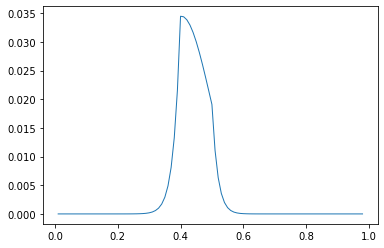

In [34]:
plot_marts_eta(
    x = samples[1:3], 
    N = N[1:3], 
    lam_func = Bets.lam_smooth, 
    combine = "fisher", 
    theta_func = Weights.theta_fixed, 
    log = False)